# Project 2: Ames Housing Data and Kaggle Challenge 

General Assembly DSI 19 Project 2 Adrian Teng 

# Executive Summary

In this project, it is splitted into three parts respectively:

- Data Cleaning (01_data_cleaning)
- Exploratory Data Analysis (02_eda)
- Conclusion (03_conclusion)

In the second notebook, 02_eda, numberical and categorical lists were created. Visualizing on features and correlation was done. New interaction features was created for better understanding.

# Content

- Creating lists for numerical and categorical
- Visualizing some features
- Looking into the correlation 
- Interaction terms


In [351]:
#import libraries

from matplotlib import pyplot as plt

import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns

from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

#import cleaned datas
clean_re_train = pd.read_csv('../datasets/clean_train.csv')
clean_re_test = pd.read_csv('../datasets/clean_test.csv')

# show all data columns and rows
pd.set_option('display.max_columns', 999)
pd.set_option('display.max_rows', 999)

#removing the 'Unnamed: 0'
clean_re_train = clean_re_train.drop(columns = ["Unnamed: 0"], axis = 1)
clean_re_test = clean_re_test.drop(columns = ["Unnamed: 0"], axis = 1)


In [352]:
clean_re_train.shape

(2049, 75)

In [353]:
clean_re_test.shape

(879, 74)

In [354]:
clean_re_train.head()

,id,pid,ms_subclass,ms_zoning,lot_area,street,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,sale_type,saleprice
0,109,533352170,60,RL,13517,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,0,3,2010,WD,130500
1,544,531379050,60,RL,11492,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,0,4,2009,WD,220000
2,153,535304180,20,RL,7922,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,0,1,2010,WD,109000
3,318,916386060,60,RL,9802,Pave,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,0,4,2010,WD,174000
4,255,906425045,50,RL,14235,Pave,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,0,3,2010,WD,138500


## Creating lists for numerical and categorical values separately

In [355]:
#get numerical columns into a list
numerical_colns = clean_re_train._get_numeric_data()
numerical_colns = list(numerical_colns)

In [356]:
#get non numerical columns into a list
categorical_colns = [i for i in clean_re_train.columns if i not in numerical_colns]
categorical_colns = list(categorical_colns)

## Visualizing some of the features

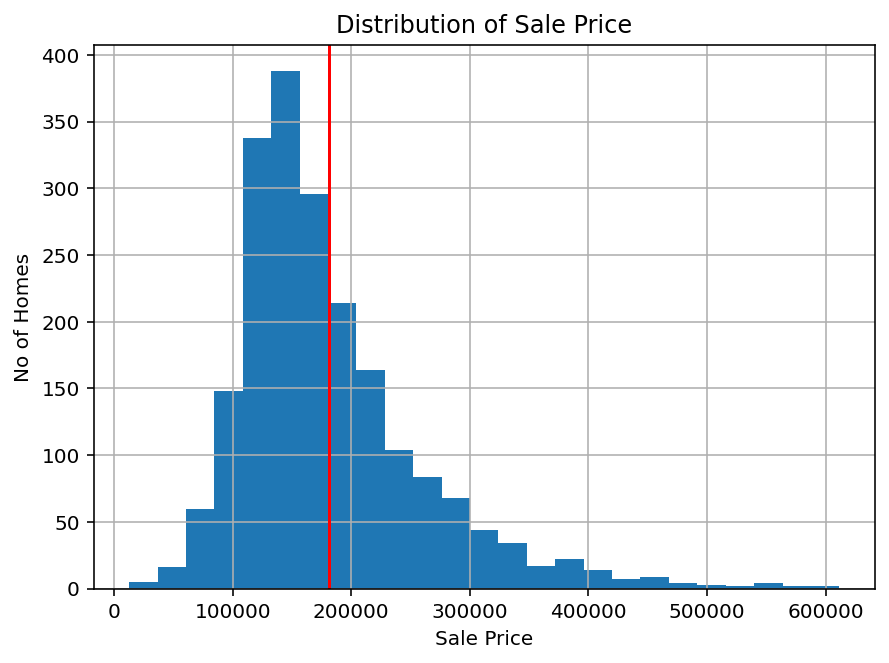

In [357]:
#plotting the distribution for saleprice

clean_ames_train['saleprice'].hist(figsize =(7,5), bins = 25)
plt.xlabel('Sale Price')
plt.ylabel('No of Homes')
plt.title('Distribution of Sale Price')
plt.axvline(np.mean(clean_re_train['saleprice']), c = 'r') #mean of sales price 

The distribution is skewed right. 

<AxesSubplot:xlabel='overall_qual', ylabel='saleprice'>

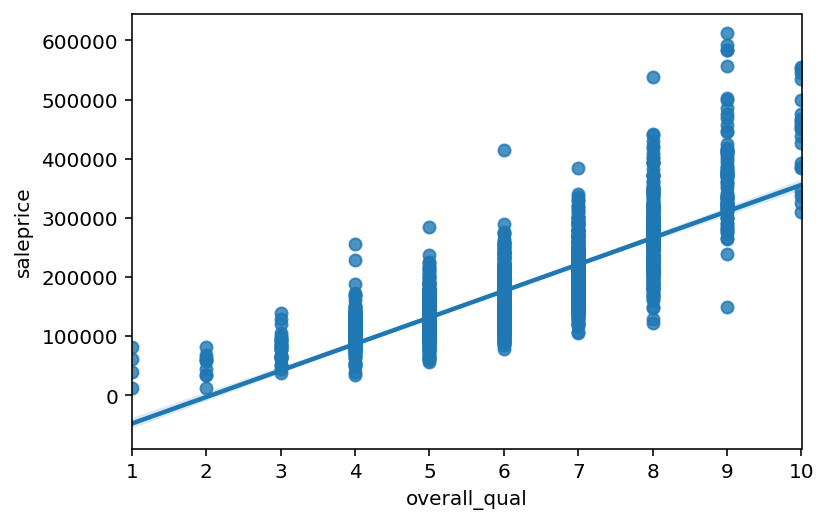

In [358]:
#Plotting of the 'overall_qual' and 'saleprice'
sns.regplot(x = clean_re_train['overall_qual'], y = clean_re_train['saleprice'])

A high correlation scatter plot and wide generalization.

<AxesSubplot:xlabel='garage_area', ylabel='saleprice'>

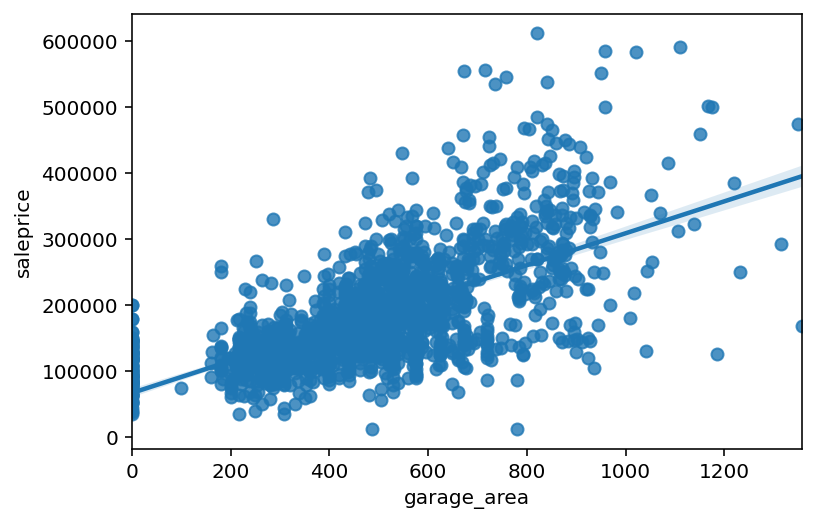

In [359]:
#Plotting of the 'garage_area' and 'saleprice'
sns.regplot(x = clean_re_train['garage_area'], y = clean_re_train['saleprice'])

Even though the correlation of the scatter plot is not high, but still moderate and no distinct outliners to be remove.

## Looking into correlation

### Setting an absolute correlation for the train data in descending order

In [360]:
#getting the absolute correlation values in descending order for the train data
clean_ames_corr = np.abs(clean_re_train.corr()[['saleprice']]).sort_values('saleprice', ascending = False)
clean_ames_corr

,saleprice
saleprice,1.000000
overall_qual,0.803462
gr_liv_area,0.719463
total_bsmt_sf,0.665116
garage_area,0.655097
1st_flr_sf,0.648252
garage_cars,0.648227
year_built,0.572405
year_remod/add,0.550872
full_bath,0.538225


<AxesSubplot:>

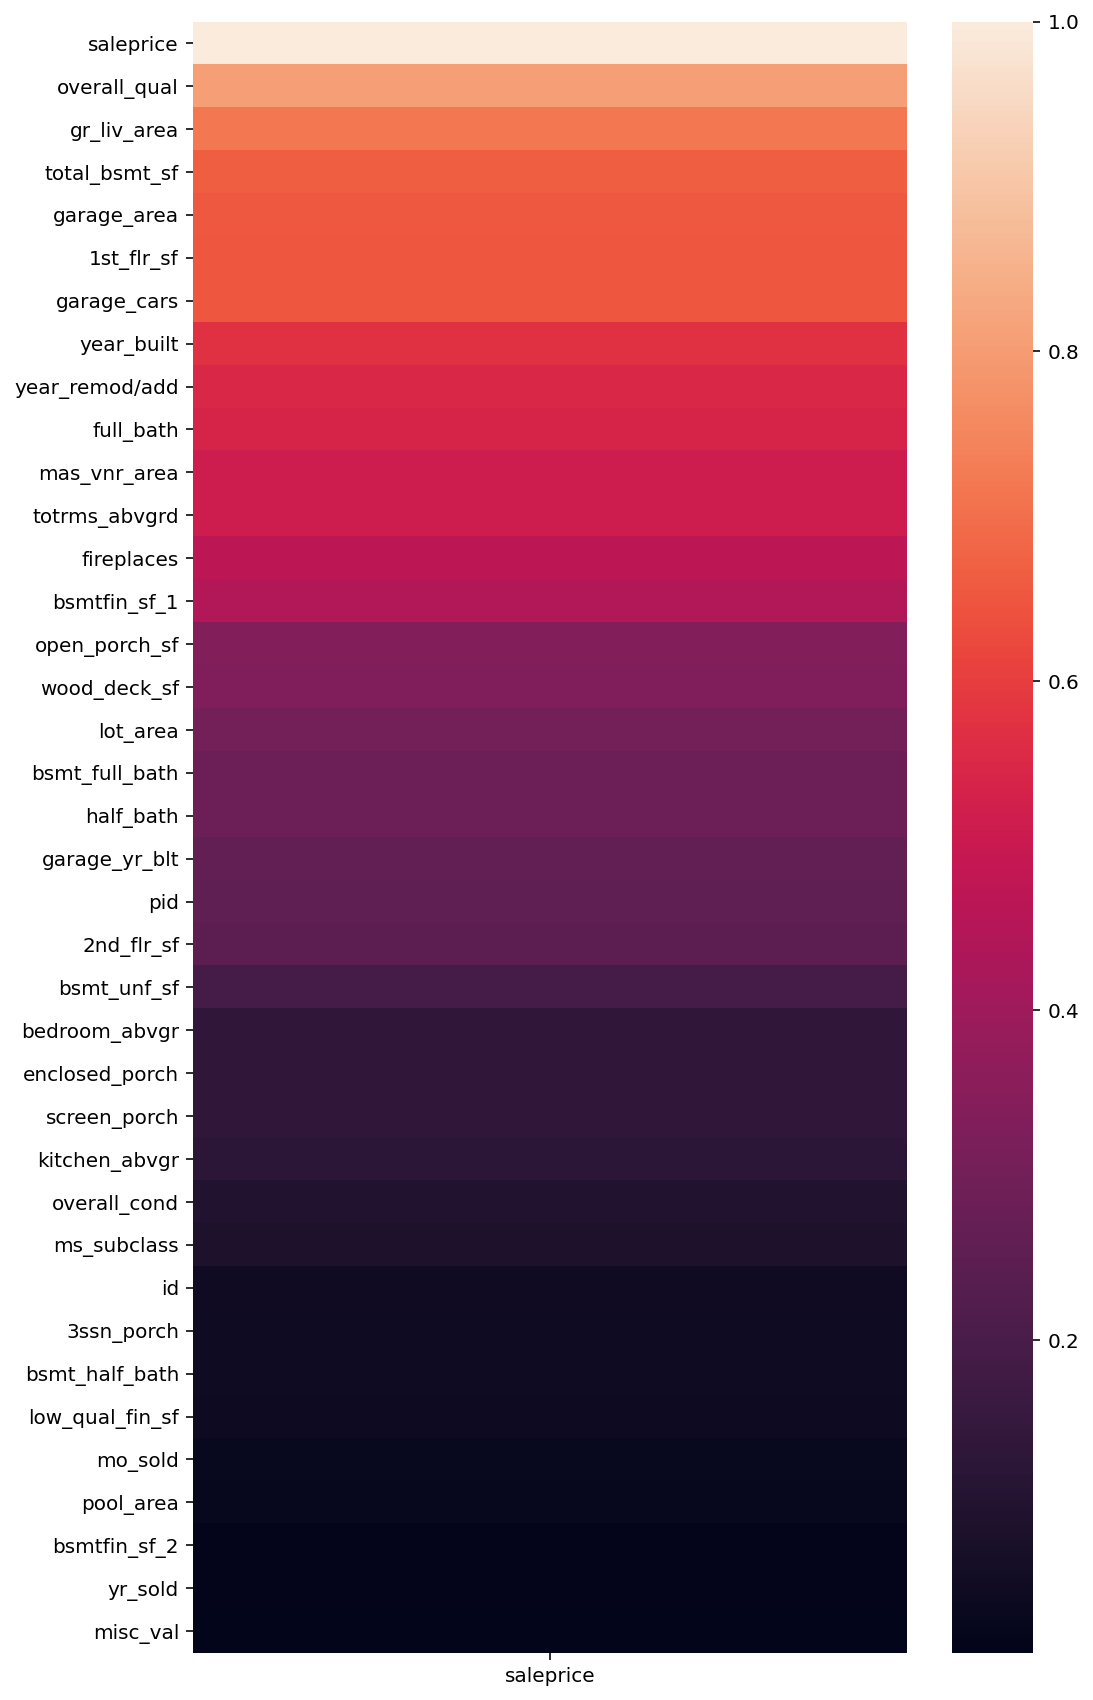

In [361]:
#create a heatmap for the train's column correlation in descending order 
plt.figure(figsize=(8,15))
sns.heatmap(clean_ames_corr)

I observe there are few features are moderately correlated have interaction points, more evalulation will be done later on to see after sorting them, will the correlation improve.

In [362]:
# list of top 5 correlated features

top_5_corr = clean_ames_train[[
                'overall_qual',
                'gr_liv_area',
                'garage_area',
                'garage_cars',
                'total_bsmt_sf',
              ]]

In [363]:
# list of btm 5 correlated features excluding pid and id

btm_5_corr = clean_re_train[[
                'misc_val',
                'yr_sold',
                'bsmtfin_sf_2',
                'pool_area',
                'low_qual_fin_sf'
              ]]


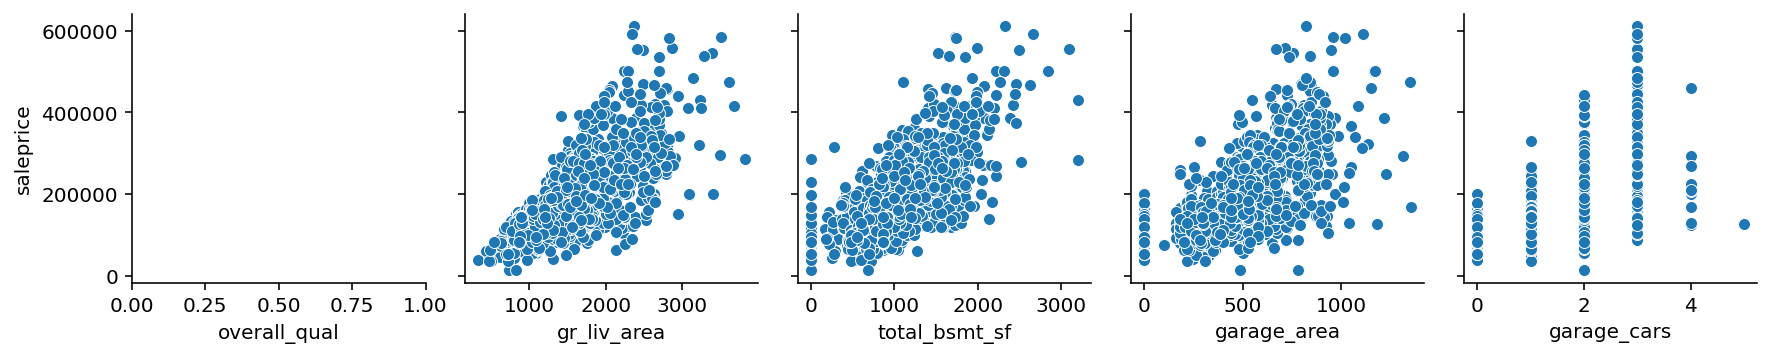

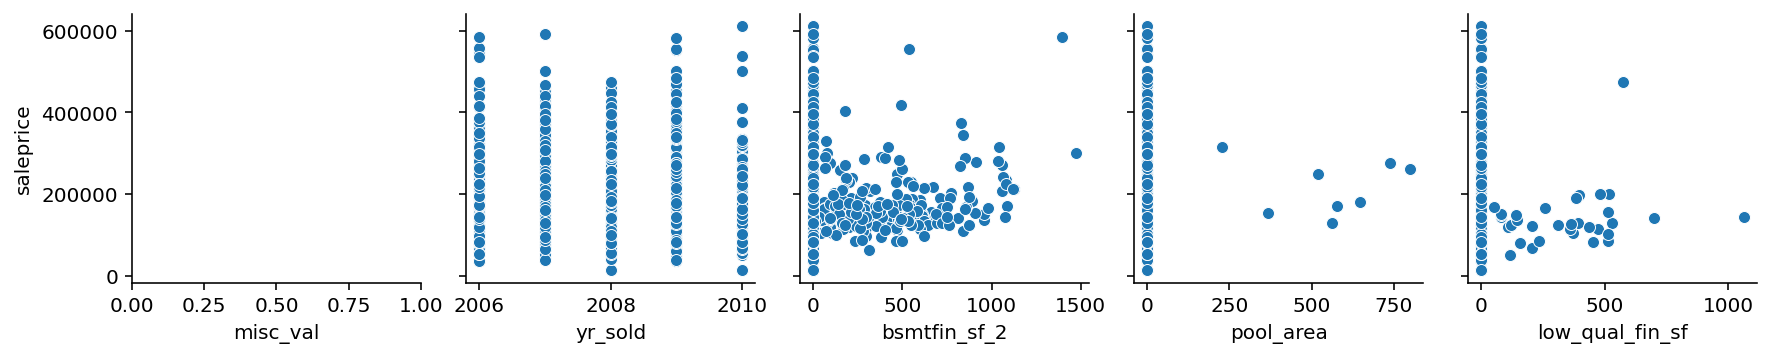

In [364]:

# pairplot for top 5 correlated features 
sns.pairplot(clean_re_train, x_vars= [
                'overall_qual',
                'gr_liv_area',
                'total_bsmt_sf',
                'garage_area',
                'garage_cars'],
             
                              y_vars=[
                'saleprice'])

#pairplot for btm 5 correlated features
sns.pairplot(clean_re_train, x_vars= [
                'misc_val',
                'yr_sold',
                'bsmtfin_sf_2',
                'pool_area',
                'low_qual_fin_sf'
                ],
             
                              y_vars=[
                'saleprice'])

The higher the correlation, the stronger the relationship the features with the saleprice. However, for low correlation, there is almost no association with saleprice at all.

array([[<AxesSubplot:title={'center':'overall_qual'}>,
        <AxesSubplot:title={'center':'gr_liv_area'}>],
       [<AxesSubplot:title={'center':'garage_area'}>,
        <AxesSubplot:title={'center':'garage_cars'}>],
       [<AxesSubplot:title={'center':'total_bsmt_sf'}>, <AxesSubplot:>]],
      dtype=object)

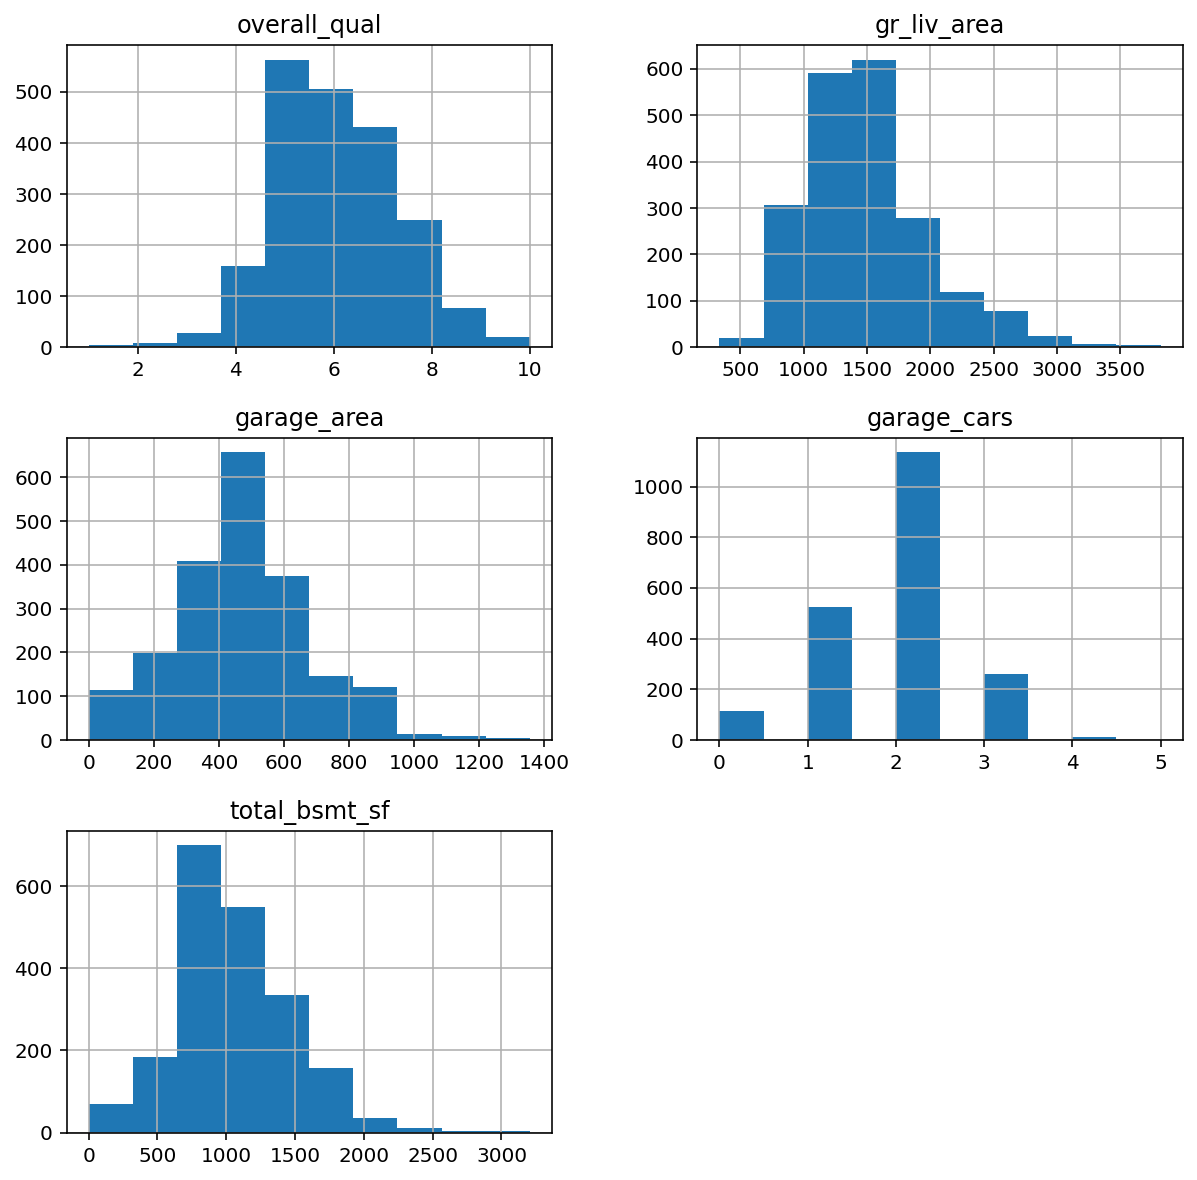

In [365]:
top_5_corr.hist(figsize=(10, 10))

array([[<AxesSubplot:title={'center':'misc_val'}>,
        <AxesSubplot:title={'center':'yr_sold'}>],
       [<AxesSubplot:title={'center':'bsmtfin_sf_2'}>,
        <AxesSubplot:title={'center':'pool_area'}>],
       [<AxesSubplot:title={'center':'low_qual_fin_sf'}>, <AxesSubplot:>]],
      dtype=object)

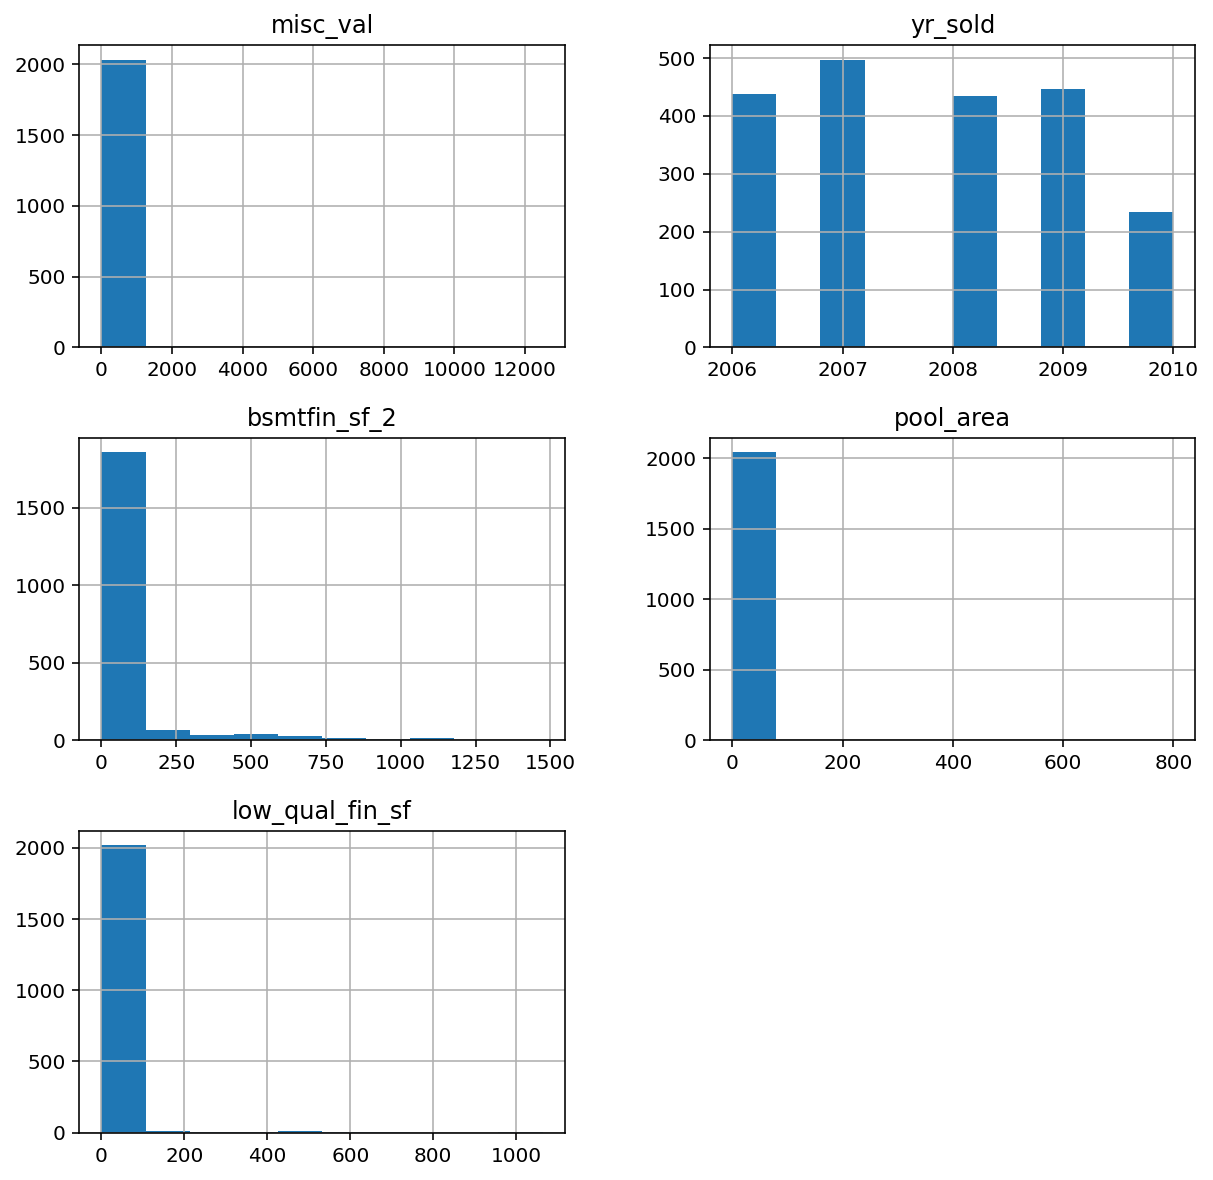

In [366]:
btm_5_corr.hist(figsize = (10,10))

High correlation data have a nice distribution slightly skwed to either left or right, whereas low correlation have either to be uniform or no asscociation at all.

## Interaction Terms

### Functions were created to add the interaction features into data

In [367]:
def add_total_bath(b):
#adding all the half bath and full bath into a single feature
    b['total_bath'] = b['half_bath']* 0.5 + b['bsmt_full_bath'] + b['bsmt_half_bath']*0.5 + b['full_bath']

add_total_bath(clean_ames_train)
add_total_bath(clean_ames_test)
numerical_colns.append('total_bath')

#removing interaction points
numberical_colns = [x for x in numerical_colns if x not in ['half_bath', 'bsmt_full_bath', 'bsmt_half_bath', 'full_bath' ]]

In [368]:
def add_total_area(w):
    #adding all the area from basement to second floor to a single feature
    w['total_area'] = w['total_bsmt_sf'] + w['1st_flr_sf'] + w['2nd_flr_sf']

add_total_area(clean_ames_train)
add_total_area(clean_ames_test)
numerical_colns.append('total_area')

#removing interaction points
numberical_colns = [x for x in numerical_colns if x not in ['total_bsmt_sf', '1st_flr_sf', '2nd_flr_sf']]

<AxesSubplot:>

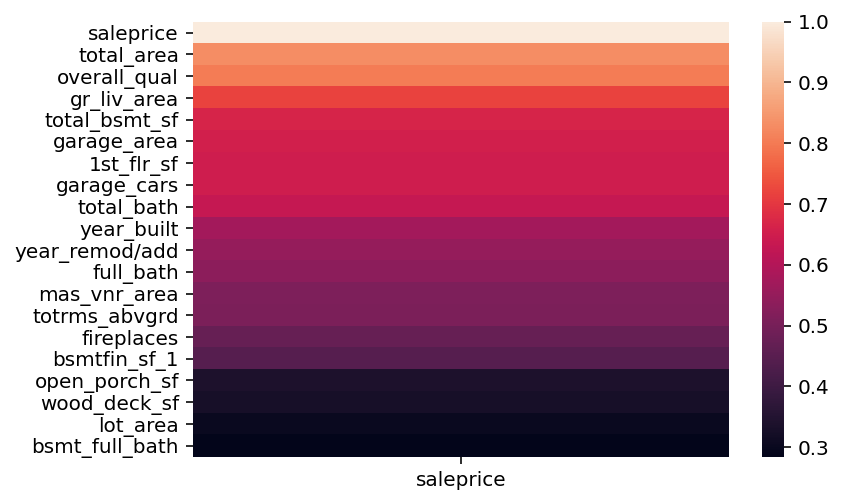

In [369]:
#printing the correlation data with the new features from highest to lowest
new_corr = np.abs(clean_ames_train.corr()[['saleprice']]).sort_values('saleprice', ascending=False)
sns.heatmap(new_corr.head(20))

Interaction features, have higher correlation than the features individually respectively.